In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
z = pd.read_csv("C:\\Users\\sulai\\Downloads\\kaggle\\Renewable_Energy_Usage_Sampled.csv")

In [15]:
z

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98
...,...,...,...,...,...,...,...,...,...,...,...,...
995,H04712,Asia,Japan,Wind,1056.65,2021,6,Middle,Urban,2018,No,307.67
996,H02314,North America,USA,Wind,1182.33,2020,2,High,Rural,2019,No,125.96
997,H03215,Europe,Germany,Wind,417.88,2023,6,Middle,Rural,2010,Yes,273.25
998,H02733,Australia,Australia,Biomass,258.91,2020,7,Middle,Urban,2017,Yes,224.35


In [17]:
z.isnull().sum()

Household_ID         0
Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64

In [19]:
z.shape

(1000, 12)

In [21]:
z.size #total number of elements

12000

In [23]:
z.ndim #dimension

2

In [25]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


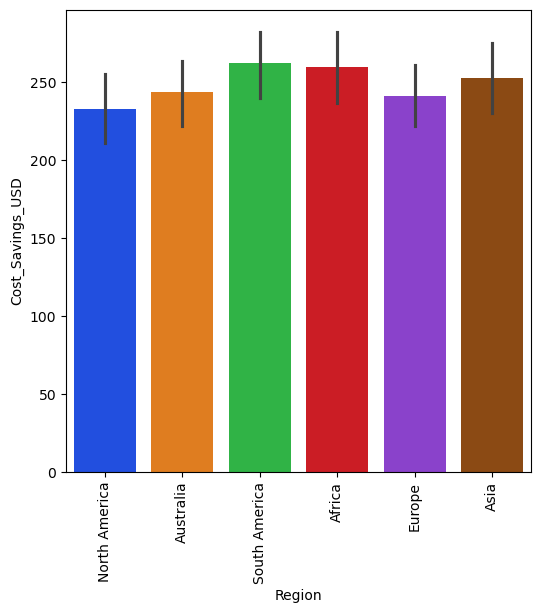

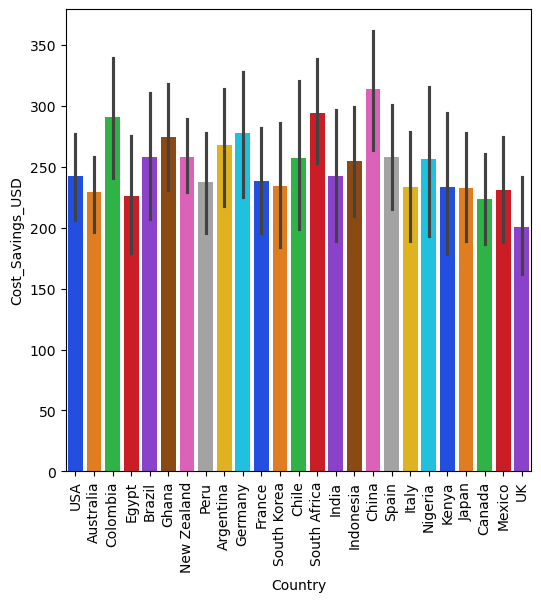

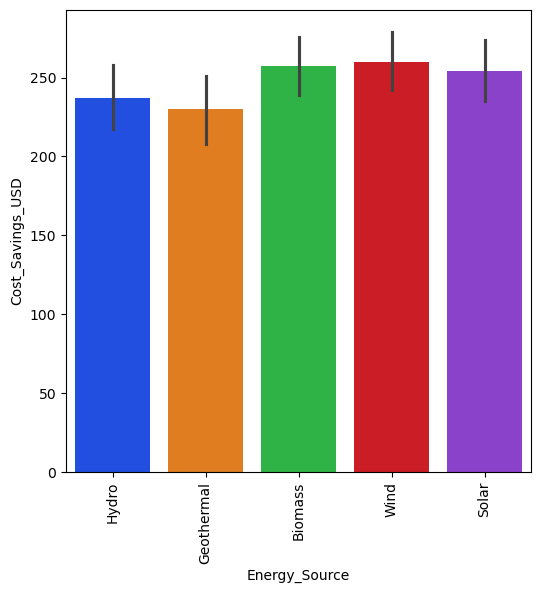

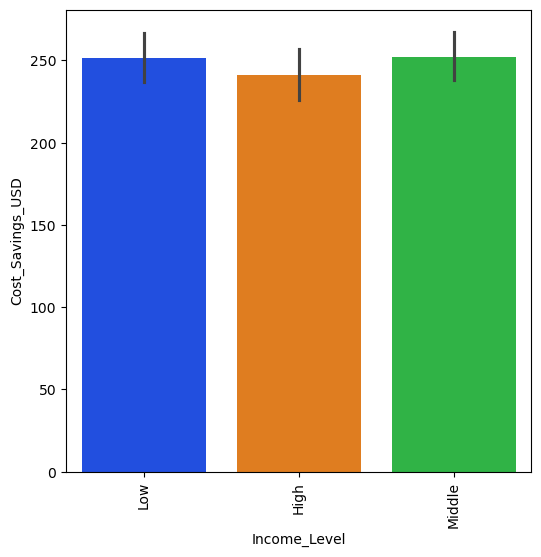

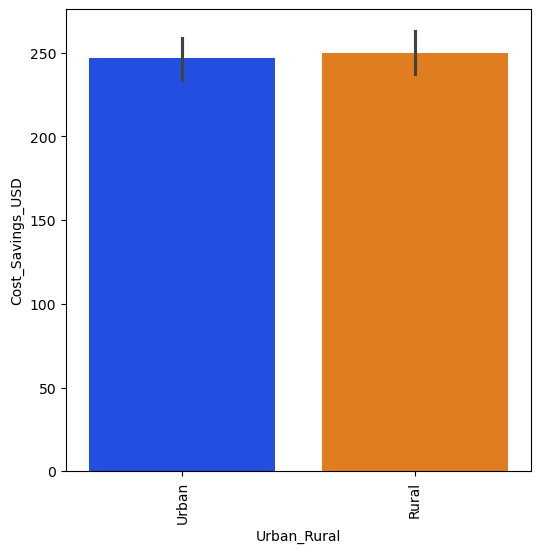

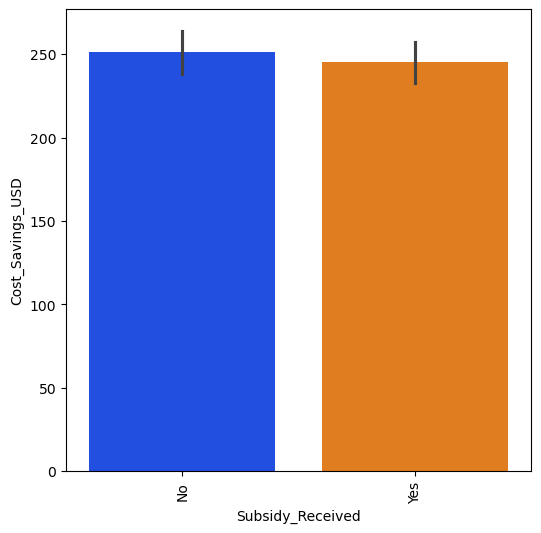

In [47]:
for i in z.columns:
    if(z[i].dtype == "object") and (i != "Household_ID"):
        plt.figure(figsize = (6,6))
        sns.barplot(x = z[i], y= z["Cost_Savings_USD"], data = z, palette = 'bright')
        plt.xticks(rotation = 90)

<Axes: xlabel='Year', ylabel='Cost_Savings_USD'>

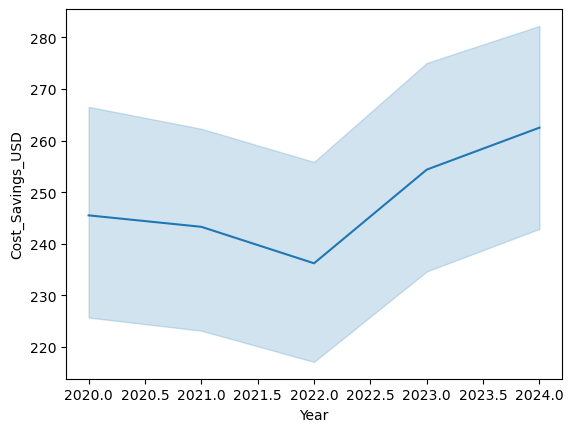

In [49]:
sns.lineplot(x = z["Year"], y = z["Cost_Savings_USD"], data = z)

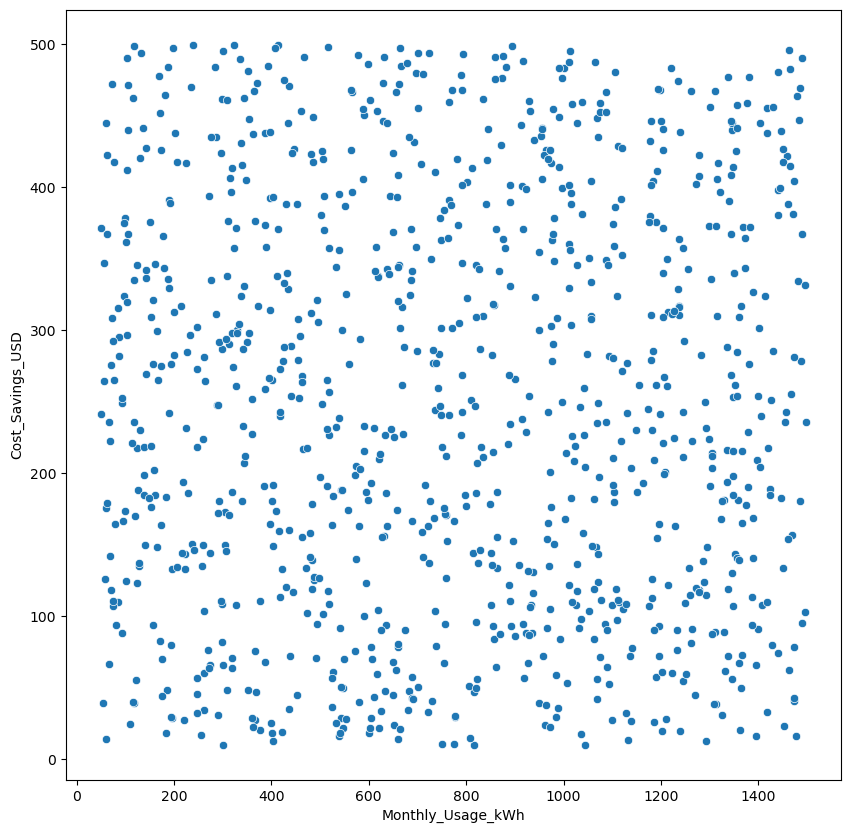

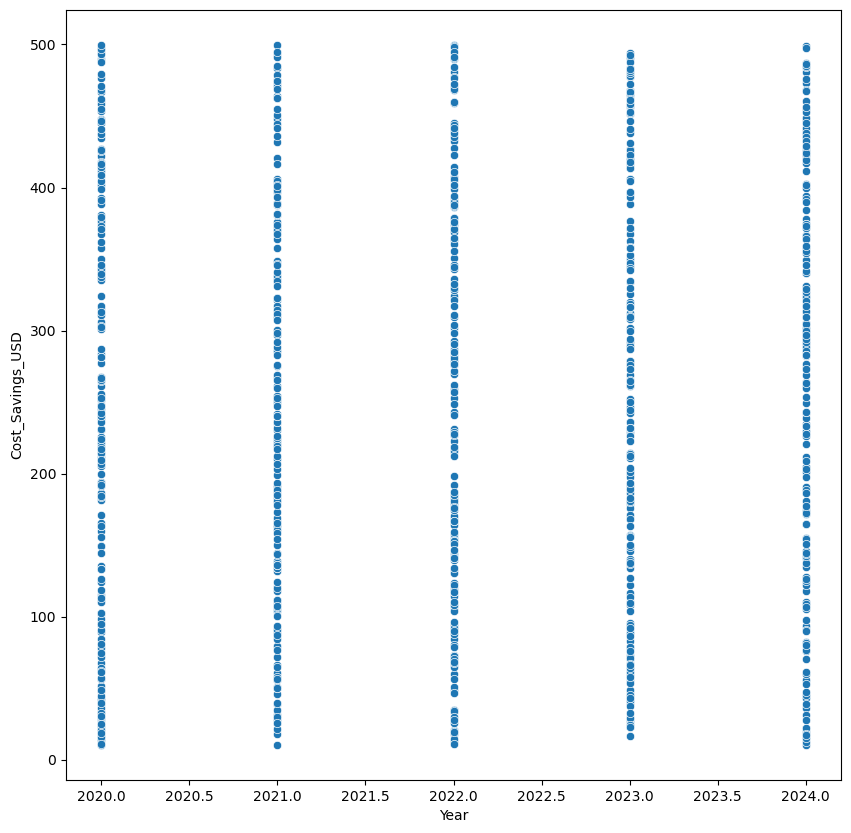

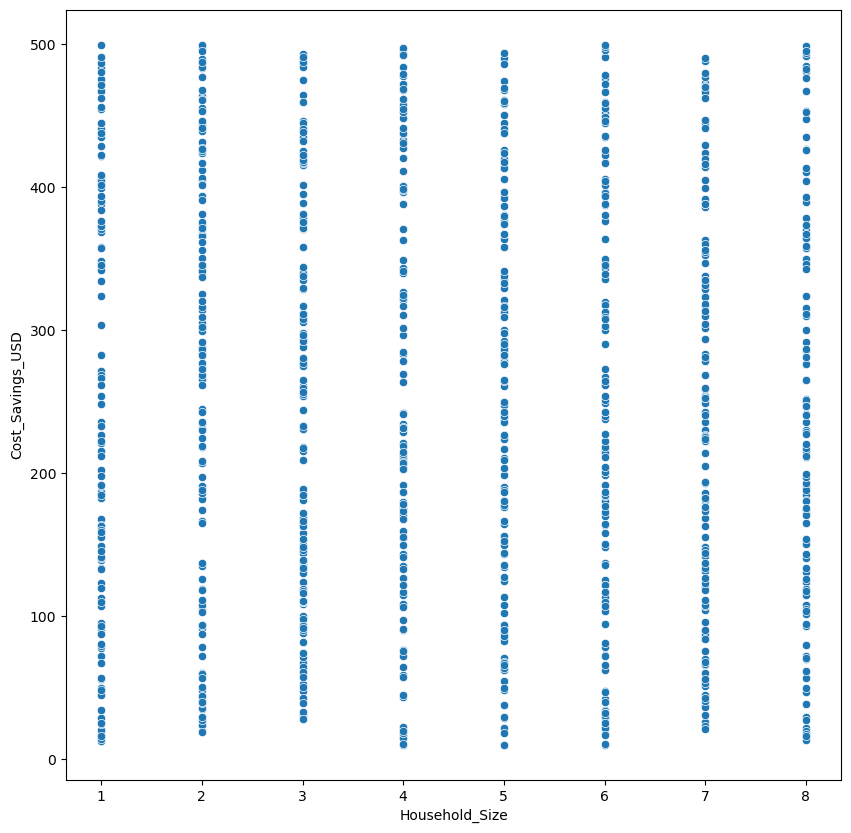

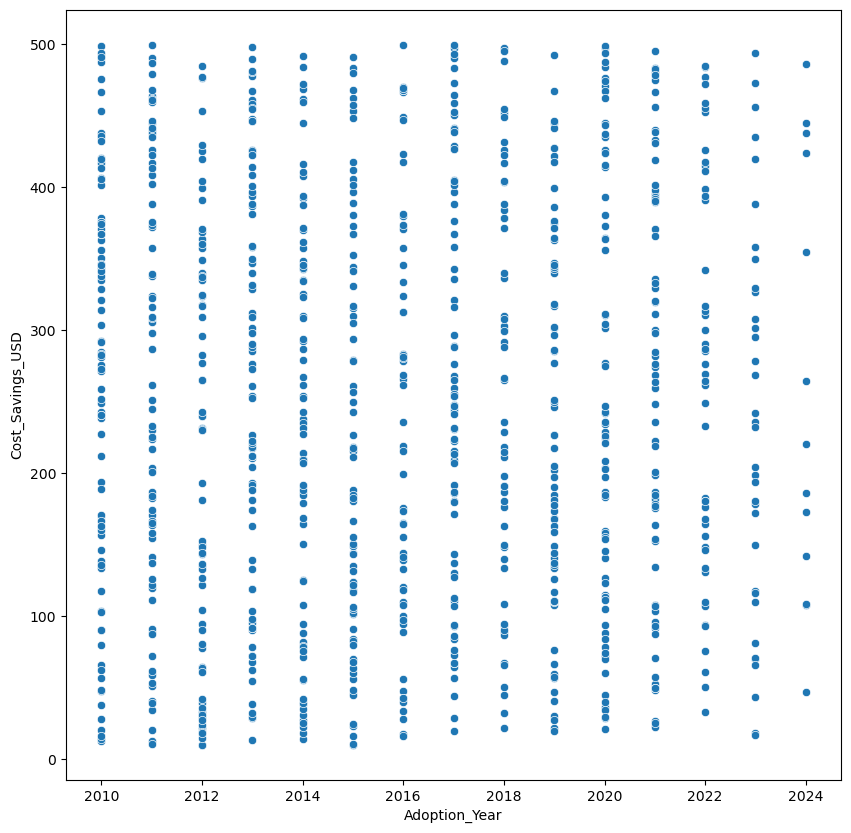

In [55]:
for i in z.columns:
    if(z[i].dtype != "object") and (i != "Cost_Savings_USD"):
        plt.figure(figsize = (10,10))
        sns.scatterplot(x = z[i], y = z["Cost_Savings_USD"],data = z)

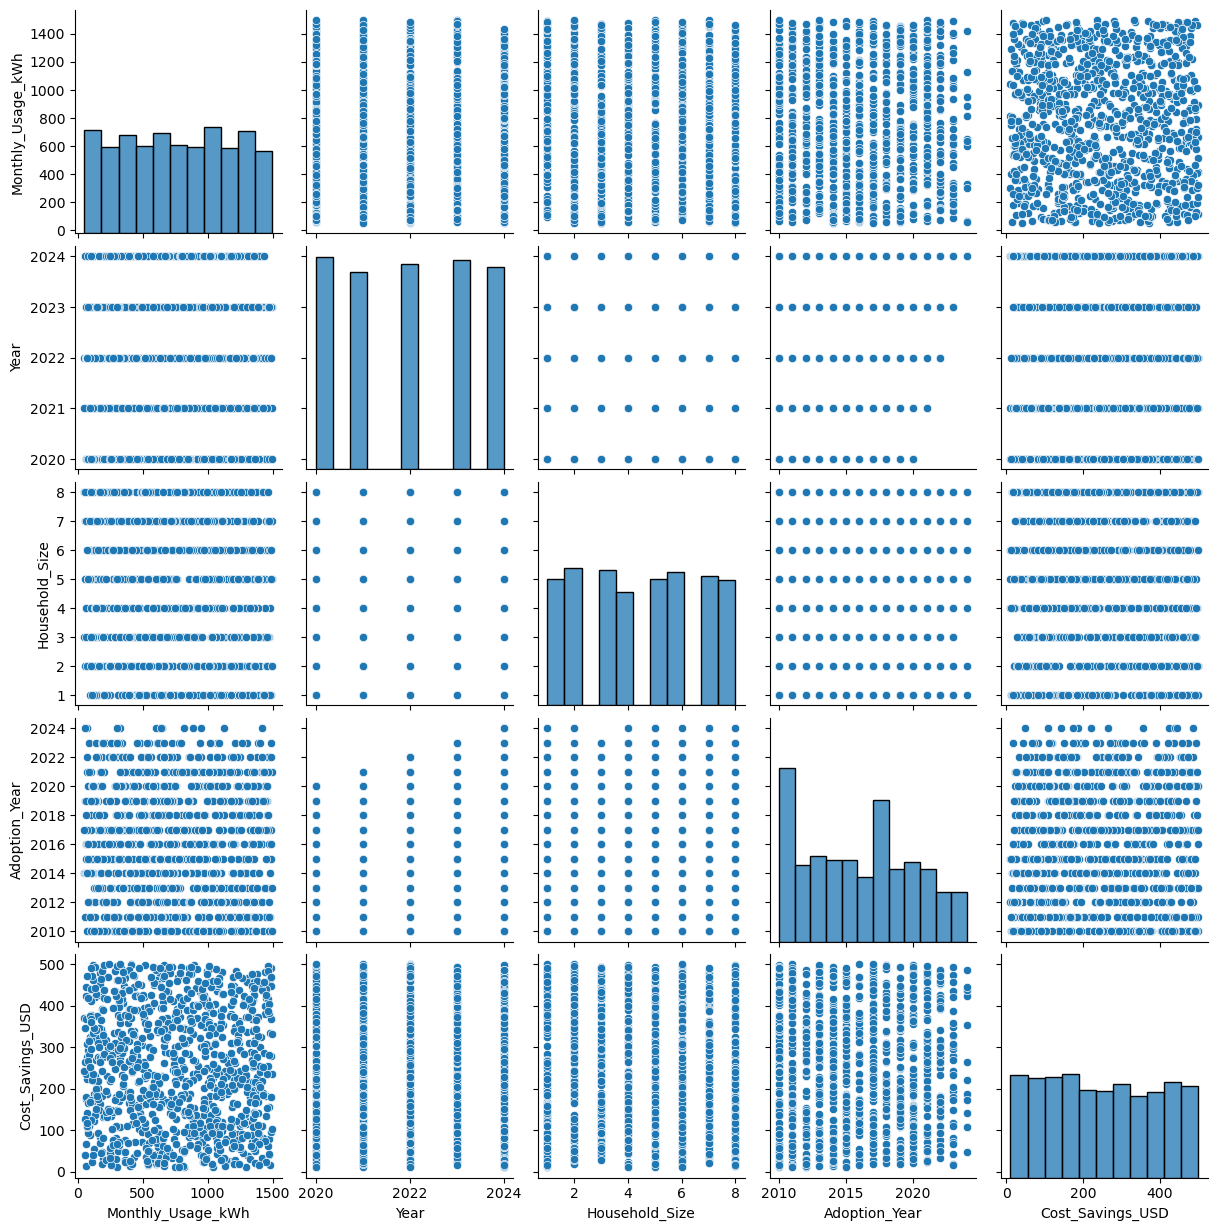

In [57]:
sns.pairplot(z)

In [59]:
new_z = z.copy()
for i in new_z:
    if(new_z[i].dtype == "object") and (i != "Household_ID"):
        new_z = pd.get_dummies(new_z, columns = [i])

In [61]:
new_z

,Household_ID,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD,Region_Africa,Region_Asia,Region_Australia,Region_Europe,...,Energy_Source_Hydro,Energy_Source_Solar,Energy_Source_Wind,Income_Level_High,Income_Level_Low,Income_Level_Middle,Urban_Rural_Rural,Urban_Rural_Urban,Subsidy_Received_No,Subsidy_Received_Yes
0,H01502,1043.49,2024,5,2012,10.46,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
1,H02587,610.01,2024,4,2023,43.49,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
2,H02654,1196.75,2024,8,2017,93.28,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,H01056,629.67,2024,7,2023,472.85,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
4,H00706,274.46,2022,7,2010,65.98,True,False,False,False,...,True,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,H04712,1056.65,2021,6,2018,307.67,False,True,False,False,...,False,False,True,False,False,True,False,True,True,False
996,H02314,1182.33,2020,2,2019,125.96,False,False,False,False,...,False,False,True,True,False,False,True,False,True,False
997,H03215,417.88,2023,6,2010,273.25,False,False,False,True,...,False,False,True,False,False,True,True,False,False,True
998,H02733,258.91,2020,7,2017,224.35,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [71]:
def change(s):
    if(s == True):
        return(1)

    else:
        return(0)

In [73]:
for i in new_z:
    if(new_z[i].dtype == "bool"):
        new_z[i] = new_z[i].apply(change)

In [75]:
new_z

,Household_ID,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD,Region_Africa,Region_Asia,Region_Australia,Region_Europe,...,Energy_Source_Hydro,Energy_Source_Solar,Energy_Source_Wind,Income_Level_High,Income_Level_Low,Income_Level_Middle,Urban_Rural_Rural,Urban_Rural_Urban,Subsidy_Received_No,Subsidy_Received_Yes
0,H01502,1043.49,2024,5,2012,10.46,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,H02587,610.01,2024,4,2023,43.49,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,H02654,1196.75,2024,8,2017,93.28,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,H01056,629.67,2024,7,2023,472.85,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,H00706,274.46,2022,7,2010,65.98,1,0,0,0,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,H04712,1056.65,2021,6,2018,307.67,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
996,H02314,1182.33,2020,2,2019,125.96,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
997,H03215,417.88,2023,6,2010,273.25,0,0,0,1,...,0,0,1,0,0,1,1,0,0,1
998,H02733,258.91,2020,7,2017,224.35,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [77]:
b = new_z.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i],axis = 1, inplace = True)

In [79]:
b

,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD,Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,...,Energy_Source_Hydro,Energy_Source_Solar,Energy_Source_Wind,Income_Level_High,Income_Level_Low,Income_Level_Middle,Urban_Rural_Rural,Urban_Rural_Urban,Subsidy_Received_No,Subsidy_Received_Yes
0,1043.49,2024,5,2012,10.46,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
1,610.01,2024,4,2023,43.49,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1196.75,2024,8,2017,93.28,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,629.67,2024,7,2023,472.85,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,274.46,2022,7,2010,65.98,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1056.65,2021,6,2018,307.67,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
996,1182.33,2020,2,2019,125.96,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
997,417.88,2023,6,2010,273.25,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
998,258.91,2020,7,2017,224.35,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [83]:
b.corr().head()

,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD,Region_Africa,Region_Asia,Region_Australia,Region_Europe,Region_North America,...,Energy_Source_Hydro,Energy_Source_Solar,Energy_Source_Wind,Income_Level_High,Income_Level_Low,Income_Level_Middle,Urban_Rural_Rural,Urban_Rural_Urban,Subsidy_Received_No,Subsidy_Received_Yes
Monthly_Usage_kWh,1.000000,-0.016280,-0.024876,-0.016443,0.000437,0.011658,0.013425,-0.044878,0.027482,-0.020925,...,0.010856,-0.029663,0.029629,-0.078228,0.025779,0.051814,-0.006650,0.006650,0.000032,-0.000032
Year,-0.016280,1.000000,0.001486,0.203238,0.044136,-0.012596,-0.008963,0.015757,0.058496,-0.041294,...,0.052255,-0.009486,-0.022189,-0.035024,0.043362,-0.007553,0.021316,-0.021316,-0.038037,0.038037
Household_Size,-0.024876,0.001486,1.000000,0.049321,-0.032560,0.000981,-0.043904,0.027834,0.019525,-0.038480,...,-0.014746,-0.004868,-0.009314,0.044082,-0.039250,-0.005305,-0.041576,0.041576,0.004842,-0.004842
Adoption_Year,-0.016443,0.203238,0.049321,1.000000,-0.002101,-0.015975,0.036336,-0.012600,0.044189,-0.029708,...,-0.047556,0.001010,0.022129,0.015336,0.033963,-0.047864,0.010636,-0.010636,0.045838,-0.045838
Cost_Savings_USD,0.000437,0.044136,-0.032560,-0.002101,1.000000,0.033631,0.013080,-0.015194,-0.023759,-0.049637,...,-0.039647,0.020102,0.044419,-0.035684,0.014667,0.020825,0.012124,-0.012124,0.021612,-0.021612


In [85]:
b.corr()["Cost_Savings_USD"].sort_values(ascending = False)

Cost_Savings_USD            1.000000
Country_China               0.076001
Country_South Africa        0.063008
Country_Colombia            0.056094
Energy_Source_Wind          0.044419
Year                        0.044136
Region_South America        0.042083
Country_Ghana               0.037606
Region_Africa               0.033631
Country_Germany             0.032781
Energy_Source_Biomass       0.031014
Country_Argentina           0.024894
Subsidy_Received_No         0.021612
Income_Level_Middle         0.020825
Country_New Zealand         0.020766
Energy_Source_Solar         0.020102
Country_Spain               0.014729
Income_Level_Low            0.014667
Region_Asia                 0.013080
Country_Brazil              0.012674
Urban_Rural_Rural           0.012124
Country_Chile               0.010121
Country_Nigeria             0.009075
Country_Indonesia           0.008303
Monthly_Usage_kWh           0.000437
Adoption_Year              -0.002101
Country_India              -0.007191
C

In [87]:
from sklearn.decomposition import PCA

In [103]:
x = b.copy()
x.drop(["Cost_Savings_USD"], axis = 1, inplace = True)
y = b["Cost_Savings_USD"]

In [105]:
a = PCA()
X = a.fit_transform(x)


In [107]:
X.shape

(1000, 47)

In [109]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=100)

In [113]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [117]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 

y_train shape: (300, 1)
y_test shape: (700, 1)


In [119]:
n = RandomForestRegressor()
n.fit(X_train, y_train)

RandomForestRegressor()

In [127]:
y_pred = n.predict(X_train)
r2_train = r2_score(y_train, y_pred)

In [129]:
round(r2_train, 2)*100

84.0

In [131]:
y_pred = n.predict(X_test)
r2_test = r2_score(y_test,y_pred)

In [135]:
round(r2_train, 2)*100

84.0